In [6]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_path = "archive"

# Collect all image paths from subfolders
image_files = []
for subfolder in os.listdir(dataset_path):
    sub_path = os.path.join(dataset_path, subfolder)
    if os.path.isdir(sub_path):  # only go inside folders
        for f in os.listdir(sub_path):
            if f.endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(os.path.join(sub_path, f))

print("Total images found:", len(image_files))
print("Example:", image_files[:5])  # show first 5 paths


Total images found: 6662
Example: ['archive\\bacterial_pneumonia\\0 (2).jpeg', 'archive\\bacterial_pneumonia\\1 (2).jpeg', 'archive\\bacterial_pneumonia\\100 (2).jpeg', 'archive\\bacterial_pneumonia\\101 (2).jpeg', 'archive\\bacterial_pneumonia\\102 (2).jpeg']


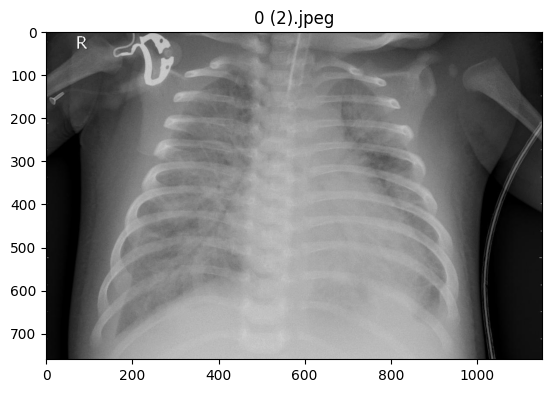

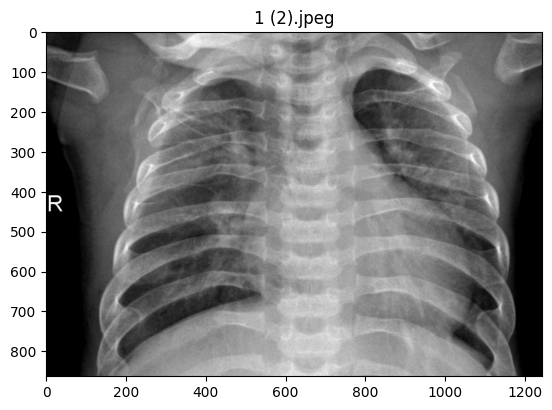

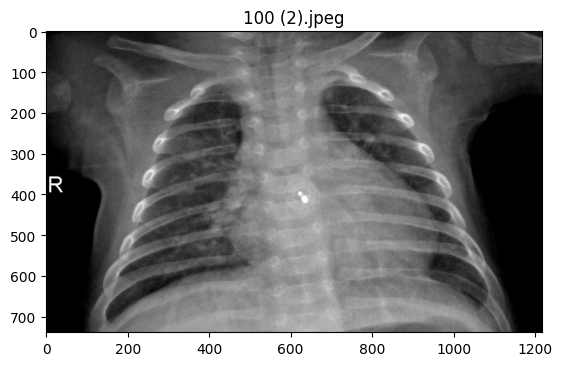

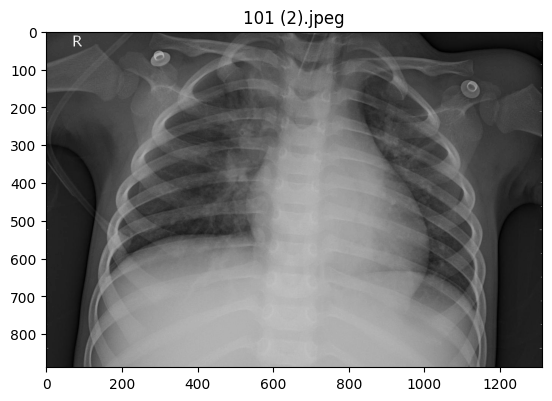

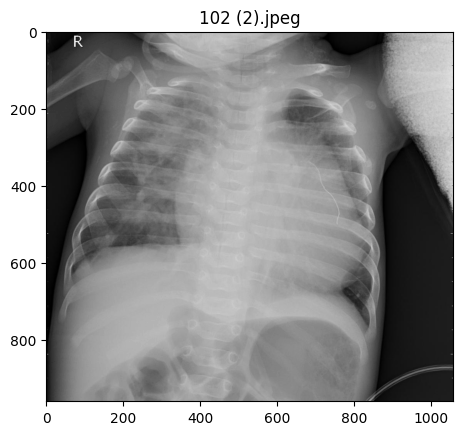

In [7]:
images = []
for file in image_files[:5]:  # load only first 5
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
        plt.imshow(img, cmap="gray")
        plt.title(os.path.basename(file))
        plt.show()


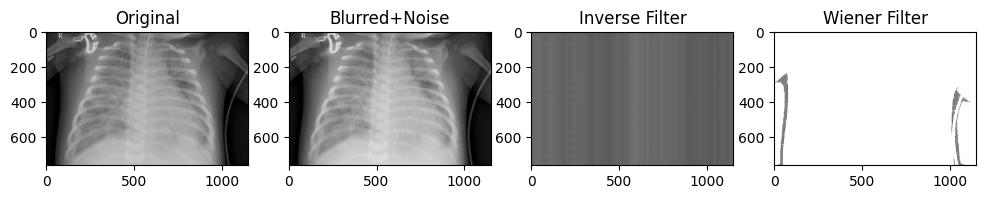

In [8]:
import numpy as np
from skimage import restoration

# PSF (blurring kernel)
psf = np.ones((5,5)) / 25  

def inverse_filter(image, psf):
    G = np.fft.fft2(image)
    H = np.fft.fft2(psf, s=image.shape)
    H[H == 0] = 1e-8  # avoid division by zero
    F_hat = G / H
    f_hat = np.abs(np.fft.ifft2(F_hat))
    return f_hat

# Test on one image
test_img = images[0]

# Simulate blur + noise
blurred = cv2.filter2D(test_img, -1, psf)
noisy = blurred + 0.1 * np.random.normal(size=blurred.shape)

# Apply inverse filter
restored_inv = inverse_filter(noisy, psf)

# Apply Wiener filter
restored_wie = restoration.wiener(noisy, psf, balance=0.1)

# Show results
plt.figure(figsize=(12,5))
plt.subplot(1,4,1), plt.imshow(test_img, cmap='gray'), plt.title("Original")
plt.subplot(1,4,2), plt.imshow(noisy, cmap='gray'), plt.title("Blurred+Noise")
plt.subplot(1,4,3), plt.imshow(restored_inv, cmap='gray'), plt.title("Inverse Filter")
plt.subplot(1,4,4), plt.imshow(restored_wie, cmap='gray'), plt.title("Wiener Filter")
plt.show()
